# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import requests
from bs4 import BeautifulSoup
import pandas as pd
import cloudscraper
import html5lib

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup, Comment
import pandas as pd
import time

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go
import plotly.colors as pc

# Scraping

In [ ]:
# THE FOLLOWING CODE IS FOR SCRAPING THE DATA AND IT WAS MADE FOR EVERY TEAM OF SERIE A, LALIGA AND PREMIER LEAGUE


# Headless Chrome configuration
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36")

# Start ChromeDriver automatically
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# URL of the Inter page
url = "https://fbref.com/en/squads/922493f3/2024-2025/all_comps/TEAM-Stats-All-Competitions"
driver.get(url)

# Please wait while the page loads
time.sleep(5)

r = driver.page_source
soup = BeautifulSoup(r, 'html.parser')

# Search for tables in HTML comments
comments = soup.find_all(string=lambda text: isinstance(text, Comment))

Standard_Stats=pd.read_html(r,match='Standard Stats ' )
TEAM_Players_Standard_Stats=pd.DataFrame(Standard_Stats[0])
TEAM_Players_Standard_Stats.columns = [
    'Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 
    'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 
    'PrgC', 'PrgP', 'PrgR', 'Gls_per_90', 'Ast_per_90', 'G+A_per_90', 'G-PK_per_90', 
    'G+A-PK_per_90', 'xG_per_90', 'xAG_per_90', 'xG+xAG_per_90', 'npxG_per_90', 'npxG+xAG_per_90', 'Matches'
]

Shooting =pd.read_html(r,match='Shooting ' )
TEAM_Players_Shooting =pd.DataFrame(Shooting[0])
TEAM_Players_Shooting.columns = [
    'Player', 'Nation', 'Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 
    'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 
    'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'
]

Passing  =pd.read_html(r,match='Passing ' )
TEAM_Players_Passing  =pd.DataFrame(Passing [0])
TEAM_Players_Passing.columns = [
    'Player', 'Nation', 'Pos', 'Age', '90s', 'Total_Cmp', 'Total_Att', 'Total_Cmp%', 
    'Total_TotDist', 'Total_PrgDist', 'Short_Cmp', 'Short_Att', 'Short_Cmp%', 
    'Medium_Cmp', 'Medium_Att', 'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'Long_Cmp%', 
    'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP', 'Matches'
]
Pass_Types  =pd.read_html(r,match='Pass Types ' )
TEAM_Players_Pass_Types  =pd.DataFrame(Pass_Types [0])
TEAM_Players_Pass_Types.columns = [
    'Player', 'Nation', 'Pos', 'Age', '90s', 'Att', 'Live', 'Dead', 'FK', 'TB', 
    'Sw', 'Crs', 'TI', 'CK', 'CornerKicks_In', 'CornerKicks_Out', 'CornerKicks_Str', 
    'Outcomes_Cmp', 'Outcomes_Off', 'Outcomes_Blocks', 'Matches'
]
Goal_and_Shot_Creation  =pd.read_html(r,match='Goal and Shot Creation ' )
TEAM_Players_Goal_and_Shot_Creation  =pd.DataFrame(Goal_and_Shot_Creation [0])
TEAM_Players_Goal_and_Shot_Creation.columns = [
    'Player', 'Nation', 'Pos', 'Age', '90s', 'SCA', 'SCA90', 'SCA_PassLive', 'SCA_PassDead', 
    'SCA_TO', 'SCA_Sh', 'SCA_Fld', 'SCA_Def', 'GCA', 'GCA90', 'GCA_PassLive', 'GCA_PassDead', 
    'GCA_TO', 'GCA_Sh', 'GCA_Fld', 'GCA_Def', 'Matches'
]
Defensive_Actions  =pd.read_html(r,match='Defensive Actions ' )
TEAM_Players_Defensive_Actions  =pd.DataFrame(Defensive_Actions [0])
TEAM_Players_Defensive_Actions.columns = [
    'Player', 'Nation', 'Pos', 'Age', '90s', 'Tackles_Tkl', 'Tackles_TklW', 'Tackles_Def3rd', 
    'Tackles_Mid3rd', 'Tackles_Att3rd', 'Challenges_Tkl', 'Challenges_Att', 'Challenges_Tkl%', 
    'Challenges_Lost', 'Blocks_Blocks', 'Blocks_Sh', 'Blocks_Pass', 'Int', 'TklInt', 'Clr', 'Err', 
    'Matches'
]
Possession   =pd.read_html(r,match='Possession ' )
TEAM_Players_Possession   =pd.DataFrame(Possession [0])
TEAM_Players_Possession.columns = [
    'Player', 'Nation', 'Pos', 'Age', '90s', 'Touches_Touches', 'Touches_DefPen', 
    'Touches_Def3rd', 'Touches_Mid3rd', 'Touches_Att3rd', 'Touches_AttPen', 
    'Touches_Live', 'TakeOns_Att', 'TakeOns_Succ', 'TakeOns_Succ%', 'TakeOns_Tkld', 
    'TakeOns_Tkld%', 'Carries_Carries', 'Carries_TotDist', 'Carries_PrgDist', 'Carries_PrgC', 
    'Carries_1/3', 'Carries_CPA', 'Carries_Mis', 'Carries_Dis', 'Receiving_Rec', 'Receiving_PrgR', 
    'Matches'
]
Miscellaneous_Stats   =pd.read_html(r,match='Miscellaneous Stats ' )
TEAM_Players_Miscellaneous_Stats   =pd.DataFrame(Miscellaneous_Stats [0])
TEAM_Players_Miscellaneous_Stats.columns = [
    'Player', 'Nation', 'Pos', 'Age', '90s', 'Performance_CrdY', 'Performance_CrdR', 
    'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld', 'Performance_Off', 
    'Performance_Crs', 'Performance_Int', 'Performance_TklW', 'Performance_PKwOn', 
    'Performance_PKwCon', 'Performance_OG', 'Performance_Recov', 'AerialDuels_Won', 
    'AerialDuels_Lost', 'AerialDuels_Won%', 'Matches'
]
Goalkeeping =pd.read_html(r,match='Goalkeeping ' )
TEAM_Players_Goalkeeping=pd.DataFrame(Goalkeeping[0])
TEAM_Players_Goalkeeping.columns = [
    'Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'GA', 'GA90',
    'SoTA', 'Saves', 'Save%', 'W', 'D', 'L', 'CS', 'CS%', 'PKatt', 'PKA', 'PKsv',
    'PKm', 'Save%', 'Matches'
]
Advanced_Goalkeeping =pd.read_html(r,match='Advanced Goalkeeping ' )
TEAM_Players_Advanced_Goalkeeping=pd.DataFrame(Advanced_Goalkeeping[0])
TEAM_Players_Advanced_Goalkeeping.columns = [
    'Player', 'Nation', 'Pos', 'Age', '90s', 'GA', 'PKA', 'FK', 'CK', 'OG', 
    'PSxG', 'PSxG/SoT', 'PSxG+/-', 'PSxG_per_90', 'Cmp', 'Att', 'Cmp%', 
    'Att_GK', 'Thr', 'Launch%', 'AvgLen', 'GoalKicks_Att', 'GoalKicks_Launch%', 
    'GoalKicks_AvgLen', 'Crosses_Opp', 'Crosses_Stp', 'Crosses_Stp%', 
    'Sweeper_OPA', 'Sweeper_OPA_per_90', 'Sweeper_AvgDist', 'Matches'
]
Playing_Time   =pd.read_html(r,match='Playing Time ' )
TEAM_Players_Playing_Time   =pd.DataFrame(Playing_Time [0])
TEAM_Players_Playing_Time.columns = [
    'Player', 'Nation', 'Pos', 'Age', 'MP', 'PlayingTime_Min', 'PlayingTime_MnPerMP', 
    'PlayingTime_Min%', 'PlayingTime_90s', 'Starts_Starts', 'Starts_MnPerStart', 
    'Starts_Compl', 'Subs_Subs', 'Subs_MnPerSub', 'Subs_unSub', 'TeamSuccess_PPM', 
    'TeamSuccess_onG', 'TeamSuccess_onGA', 'TeamSuccess_+/-', 'TeamSuccess_+/-90', 
    'TeamSuccess_OnOff', 'TeamSuccess_xG_onxG', 'TeamSuccess_xG_onxGA', 'TeamSuccess_xG+/-', 
    'TeamSuccess_xG+/-90', 'TeamSuccess_OnOff_xG', 'Matches'
]

df1=pd.merge(TEAM_Players_Advanced_Goalkeeping, TEAM_Players_Defensive_Actions, on='Player', how='outer')
df1.drop(["Matches_x", "Matches_y", "Nation_x","Pos_x","Age_x","90s_x"], axis=1, inplace=True)
df1.rename(columns={"Nation_y":"Nation","Pos_y":"Pos","Age_y":"Age","90s_y":"90s"}, inplace=True)
df2=pd.merge(df1, TEAM_Players_Goal_and_Shot_Creation, on='Player', how='outer')
df2.drop(["Matches", "Nation_x","Pos_x","Age_x","90s_x"], axis=1, inplace=True)
df2.rename(columns={"Nation_y":"Nation","Pos_y":"Pos","Age_y":"Age","90s_y":"90s"}, inplace=True)
df3=pd.merge(df2, TEAM_Players_Goalkeeping, on='Player', how='outer')
df3.drop(["Matches", "Nation_y","Pos_y","Age_y","90s_y","GA_y","PKA_y"],axis=1, inplace=True)
df3.rename(columns={"Nation_x":"Nation","Pos_x":"Pos","Age_x":"Age","90s_x":"90s","GA_x":"GA","PKA_x":"PKA"}, inplace=True)
df4=pd.merge(df3, TEAM_Players_Miscellaneous_Stats, on='Player', how='outer')
df4.drop(["Matches", "Nation_y","Pos_y","Age_y","90s_y"],axis=1, inplace=True)
df4.rename(columns={"Nation_x":"Nation","Pos_x":"Pos","Age_x":"Age","90s_x":"90s"}, inplace=True)
df5=pd.merge(df4, TEAM_Players_Pass_Types, on='Player', how='outer')
df5.drop(["Matches", "Nation_y","Pos_y","Age_y","90s_y"],axis=1, inplace=True)
df5.rename(columns={"Nation_x":"Nation","Pos_x":"Pos","Age_x":"Age","90s_x":"90s",
                    "FK_x":"FK_Launched","CK_x":"CK_Launched","Att_x":"Att_Launched",
                    "Att_y":"Att","FK_y":"FK","CK_y":"CK"}, inplace=True)
df6=pd.merge(df5, TEAM_Players_Passing, on='Player', how='outer')
df6.drop(["Matches", "Nation_y","Pos_y","Age_y","90s_y","Total_Att"],axis=1, inplace=True)
df6.rename(columns={"Nation_x":"Nation","Pos_x":"Pos","Age_x":"Age","90s_x":"90s"}, inplace=True)
df7=pd.merge(df6, TEAM_Players_Playing_Time, on='Player', how='outer')
df7.drop(["Matches", "Nation_x","Pos_x","Age_x","MP_x"],axis=1, inplace=True)
df7.rename(columns={"Nation_y":"Nation","Pos_y":"Pos","Age_y":"Age","MP_y":"MP"}, inplace=True)
df8=pd.merge(df7, TEAM_Players_Possession, on='Player', how='outer')
df8.drop(["Matches", "Nation_y","Pos_y","Age_y","90s_y"],axis=1, inplace=True)
df8.rename(columns={"Nation_x":"Nation","Pos_x":"Pos","Age_x":"Age","90s_x":"90s"}, inplace=True)
df9=pd.merge(df8, TEAM_Players_Shooting, on='Player', how='outer')
df9.drop(["Matches", "Nation_y","Pos_y","Age_y","90s_y","PKatt_x","FK_x"],axis=1, inplace=True) #PKatt_x e PKA are the same thing
df9.rename(columns={"Nation_x":"Nation","Pos_x":"Pos","Age_x":"Age","90s_x":"90s","PKatt_y":"PKatt","FK_y":"FK"}, inplace=True)
df10=pd.merge(df9, TEAM_Players_Standard_Stats, on='Player', how='outer')
df10.drop(["Matches", "Nation_y","Pos_y","Age_y","90s_y","Starts_y","Min_y","Ast_y","xAG_y","PrgP_y","MP_y","Gls_y","PK_y",
          "PKatt_y","xG_y","npxG_y"],axis=1, inplace=True)
df10.rename(columns={"Nation_x":"Nation","Pos_x":"Pos","Age_x":"Age","90s_x":"90s","Starts_x":"Starts","Min_x":"Min",
                    "Ast_x":"Ast","xAG_x":"xAG","PrgP_x":"PrgP","MP_x":"MP","Gls_x":"Gls","PK_x":"PK",
                    "PKatt_x":"PKatt","xG_x":"xG","npxG_x":"npxG"}, inplace=True)
df10_1 = df10[df10["Player"].notna()]  
tot = df10_1[df10_1["Player"] != "Player"]

TEAM_MF = tot[tot["Pos"].str.contains("MF", na=False)]

TEAM_MF.to_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/TEAM'
'/TEAM_MF_2024_2025.csv', index=False)

## All MF for every teams 

In [ ]:
Atalanta_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Atalanta/Atalanta_MF_2024_2025.csv')
Bologna_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Bologna/Bologna_MF_2024_2025.csv')
Cagliari_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Cagliari/Cagliari_MF_2024_2025.csv')
Como_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Como/Como_MF_2024_2025.csv')
Empoli_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Empoli/Empoli_MF_2024_2025.csv')
Fiorentina_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Fiorentina/Fiorentina_MF_2024_2025.csv')
Inter_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Inter/Inter_MF_2024_2025.csv')
Genoa_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Genoa/Genoa_MF_2024_2025.csv')
Juve_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Juve/Juve_MF_2024_2025.csv')
Lecce_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Lecce/Lecce_MF_2024_2025.csv')
Lazio_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Lazio/Lazio_MF_2024_2025.csv')
Milan_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Milan/Milan_MF_2024_2025.csv')
Monza_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Monza/Monza_MF_2024_2025.csv')
Napoli_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Napoli/Napoli_MF_2024_2025.csv')
Parma_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Parma/Parma_MF_2024_2025.csv')
Roma_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Roma/Roma_MF_2024_2025.csv')
Torino_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Torino/Torino_MF_2024_2025.csv')
Udinese_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Udinese/Udinese_MF_2024_2025.csv')
Venezia_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Venezia/venezia_MF_2024_2025.csv')
Verona_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/Verona/Verona_MF_2024_2025.csv')

Serie_A_MF_2024_2025 = pd.concat([Atalanta_MF_2024_2025,
                                   Bologna_MF_2024_2025, 
                                   Cagliari_MF_2024_2025,
                                     Como_MF_2024_2025, 
                                     Empoli_MF_2024_2025, 
                                     Fiorentina_MF_2024_2025, 
                                     Inter_MF_2024_2025, 
                                     Genoa_MF_2024_2025, 
                                     Juve_MF_2024_2025, 
                                     Lecce_MF_2024_2025, 
                                     Lazio_MF_2024_2025, 
                                     Milan_MF_2024_2025, 
                                     Monza_MF_2024_2025, 
                                     Napoli_MF_2024_2025, 
                                     Parma_MF_2024_2025, 
                                     Roma_MF_2024_2025, 
                                     Torino_MF_2024_2025, 
                                     Udinese_MF_2024_2025, 
                                     Venezia_MF_2024_2025, 
                                     Verona_MF_2024_2025], ignore_index=True)
Serie_A_MF_2024_2025
Serie_A_MF_2024_2025.to_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/SERIE_A MF/Serie_A_MF_2024_2025.csv', index=False)


Alaves_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Alaves/Alaves_MF_2024_2025.csv')
AtleticoMadrid_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Atletico Madrid/AtleticoMadrid_MF_2024_2025.csv')
Barcelona_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Barcellona/Barcelona_MF_2024_2025.csv')
Betis_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Betis/RealBetis_MF_2024_2025.csv')
Bilbao_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Bilbao/AthleticBilbao_MF_2024_2025.csv')
CeltaVigo_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Celta Vigo/CeltaVigo_MF_2024_2025.csv')
Espanyol_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Espanyol/Espanyol_MF_2024_2025.csv')
Getafe_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Getafe/Getafe_MF_2024_2025.csv')
Girona_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Girona/Girona_MF_2024_2025.csv')
Las_Palmas_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Las Palmas/Las_Palmas_MF_2024_2025.csv')
Leganes_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Leganes/Leganes_MF_2024_2025.csv')
Mallorca_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Mallorca/Mallorca_MF_2024_2025.csv')
Osasuna_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Osasuna/Osasuna_MF_2024_2025.csv')
RayoVallecano_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Rayo Vallecano/RayoVallecano_MF_2024_2025.csv')
RealMadrid_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Real Madrid/RealMadrid_MF_2024_2025.csv')
RealSociedad_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Real Sociedad/RealSociedad_MF_2024_2025.csv')
Sevilla_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Sevilla/Sevilla_MF_2024_2025.csv')
Valencia_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Valencia/Valencia_MF_2024_2025.csv')
Valladolid_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Valladolid/Valladolid_MF_2024_2025.csv')
Villareal_MF_2024_2025 = pd.read_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/Villareal/Villareal_MF_2024_2025.csv')

LaLiga_MF_2024_2025 = pd.concat([Alaves_MF_2024_2025, 
                                 AtleticoMadrid_MF_2024_2025,
                                   Barcelona_MF_2024_2025, 
                                   Betis_MF_2024_2025,
                                     Bilbao_MF_2024_2025,
                                       CeltaVigo_MF_2024_2025, 
                                       Espanyol_MF_2024_2025, 
                                       Getafe_MF_2024_2025, 
                                       Girona_MF_2024_2025, 
                                       Las_Palmas_MF_2024_2025, 
                                       Leganes_MF_2024_2025, 
                                       Mallorca_MF_2024_2025,
                                         Osasuna_MF_2024_2025,
                                           RayoVallecano_MF_2024_2025, 
                                           RealMadrid_MF_2024_2025,
                                             RealSociedad_MF_2024_2025, 
                                             Sevilla_MF_2024_2025, 
                                             Valencia_MF_2024_2025, 
                                             Valladolid_MF_2024_2025, 
                                             Villareal_MF_2024_2025], ignore_index=True)  
LaLiga_MF_2024_2025

LaLiga_MF_2024_2025.to_csv('C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/LA Liga/LA_LIGA MF/LaLiga_MF_2024_2025.csv', index=False)

Arsenal_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Arsenal/Arsenal_MF_2024_2025.csv")
Aston_Villa_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Aston Villa/Aston_Villa_MF_2024_2025.csv")
Bornemouth_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Bournemouth/Bournemouth_MF_2024_2025.csv")
Brentford_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Brentford/Brentford_MF_2024_2025.csv")
Brighton_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Brighton/Brighton_MF_2024_2025.csv")
Chelsea_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Chelsea/Chelsea_MF_2024_2025.csv")
City_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/City/City_MF_2024_2025.csv")
Crystal_Palace_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Crystal Palace/Crystal_Palace_MF_2024_2025.csv")
Everton_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Everton/Everton_MF_2024_2025.csv")
Fulham_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Fulham/Fulham_MF_2024_2025.csv")
Ipswich_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Ipswich/Ipswich_MF_2024_2025.csv")
Leicester_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Leicester/Leicester_MF_2024_2025.csv")
Liverpool_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Liverpool/Liverpool_MF_2024_2025.csv")
Newcastle_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Newcastle/Newcastle_MF_2024_2025.csv")
Nottingham_Forest_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Nottingham Forest/Nottingham_Forest_MF_2024_2025.csv")
Southampton_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Southampton/Southampton_MF_2024_2025.csv")
Tottenham_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Tottenham/Tottenham_MF_2024_2025.csv")
United_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/United/United_MF_2024_2025.csv")
West_Ham_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/West Ham/West_Ham_MF_2024_2025.csv")
Wolves_MF_2024_2025=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/Wolves/Wolves_MF_2024_2025.csv")

Premier_MF_2024_2025=pd.concat([Arsenal_MF_2024_2025,
                                Aston_Villa_MF_2024_2025,
                                Bornemouth_MF_2024_2025,
                                Brentford_MF_2024_2025,
                                Brighton_MF_2024_2025,
                                Chelsea_MF_2024_2025,
                                City_MF_2024_2025,
                                Crystal_Palace_MF_2024_2025,
                                Everton_MF_2024_2025,
                                Fulham_MF_2024_2025,
                                Ipswich_MF_2024_2025,
                                Leicester_MF_2024_2025,
                                Liverpool_MF_2024_2025,
                                Newcastle_MF_2024_2025,
                                Nottingham_Forest_MF_2024_2025,
                                Southampton_MF_2024_2025,
                                Tottenham_MF_2024_2025,
                                United_MF_2024_2025,
                                West_Ham_MF_2024_2025,
                                Wolves_MF_2024_2025],ignore_index=True)
Premier_MF_2024_2025

Premier_MF_2024_2025.to_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/PPREMIER_LEAGUE MF/Premier_MF_2024_2025.csv",index=False)


## All MF Players form Serie A, LaLiga and Premier League

In [154]:
LaLiga_MF=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/La Liga/LA_LIGA MF/LaLiga_MF_2024_2025.csv")
Premier_MF=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Premier/PPREMIER_LEAGUE MF/Premier_MF_2024_2025.csv")
SerieA_MF=pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/Serie A/SERIE_A MF/Serie_A_MF_2024_2025.csv")

TOT_MF=pd.concat([LaLiga_MF,
                  Premier_MF,
                  SerieA_MF],ignore_index=True)
TOT_MF

TOT_MF.to_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/TOT MF/TOT_MF_2024_2025.csv", index=False)

# Data Cleaning and Preparation

## Data Reading


In [121]:
df = pd.read_csv("C:/Users/fccat/Documents/Universita/DATA SCIENCE/Data Science Lab/TOT MF/TOT_MF_2024_2025.csv")
df

,Player,GA,PKA,FK_Launched,CK_Launched,OG,PSxG,PSxG/SoT,PSxG+/-,PSxG_per_90,...,Gls_per_90,Ast_per_90,G+A_per_90,G-PK_per_90,G+A-PK_per_90,xG_per_90,xAG_per_90,xG+xAG_per_90,npxG_per_90,npxG+xAG_per_90
0,Abderrahman Rebbach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.04,0.07,0.11,0.04,0.11
1,Alejandro Jay Agustín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ander Guevara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.04,0.04,0.00,0.04,0.04,0.03,0.07,0.04,0.07
3,Antonio Blanco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.03,0.03,0.00,0.03,0.03,0.05,0.08,0.03,0.08
4,Carles Aleñá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.17,0.17,0.00,0.17,0.06,0.11,0.17,0.06,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Paweł Dawidowicz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01
990,Reda Belahyane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.11,0.11,0.00,0.11,0.01,0.06,0.07,0.01,0.07
991,Stefan Mitrović,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,Suat Serdar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.13,0.07,0.20,0.13,0.20,0.13,0.06,0.19,0.13,0.19


In [122]:
# Exclude any non-numeric columns (e.g., name, team)
df_num = df.select_dtypes(include=[np.number])
df_num.shape

(994, 203)

## NaN Managing


In [123]:
print("Number of NaN per variable:\n", df_num.isna().sum())

Number of NaN per variable:
 GA                 994
PKA                994
FK_Launched        994
CK_Launched        994
OG                 994
                  ... 
xG_per_90          171
xAG_per_90         171
xG+xAG_per_90      171
npxG_per_90        171
npxG+xAG_per_90    171
Length: 203, dtype: int64


In [124]:
# Remove variables that are irrelevant to midfielders (e.g., goalkeeper statistics)
cols_to_drop = ["GA", "PKA", "FK_Launched", "CK_Launched", "OG", "PSxG", "PSxG/SoT", "PSxG+/-", "PSxG_per_90", "Cmp", "Att_Launched", "Cmp%", "Att_GK", 
                "Thr", "Launch%", "AvgLen", "GoalKicks_Att", "GoalKicks_Launch%", "GoalKicks_AvgLen", "Crosses_Opp", "Crosses_Stp", "Crosses_Stp%", "Sweeper_OPA",
                  "Sweeper_OPA_per_90", "Sweeper_AvgDist", "Starts", "Min", "GA90", "SoTA", "Saves", "Save%", "W", "D", "L", "CS", "CS%", "PKsv", "PKm", "Save%.1", ]
df_num = df_num.drop(columns=[c for c in cols_to_drop if c in df_num.columns])
df_num.shape

(994, 164)

In [125]:
# Fill the NaNs of the offensive variables with 0 (better than mean/median in this case)
df_num = df_num.fillna(0)
df_num.shape

(994, 164)

## I only consider players with significant playing time.

In [126]:
# Threshold on number of matches played
threshold = 20  

# Filter players with at least 'threshold' matches played
df_num_filtered = df_num[df_num["MP"] >= threshold].copy()

# Print summary
print(f"Original dataset: {df_num.shape[0]} players")
print(f"Filtered dataset: {df_num_filtered.shape[0]} players (MP >= {threshold})")


Original dataset: 994 players
Filtered dataset: 496 players (MP >= 20)


## Variance Check


In [127]:
low_var = df_num_filtered.var()[df_num_filtered.var() < 1e-3]
print("Quasi-constant variables to be discarded:", list(low_var.index))

df_num_filtered = df_num_filtered.drop(columns=low_var.index)
df_num_filtered.shape

Quasi-constant variables to be discarded: []


(496, 164)

## Correlation Matrix


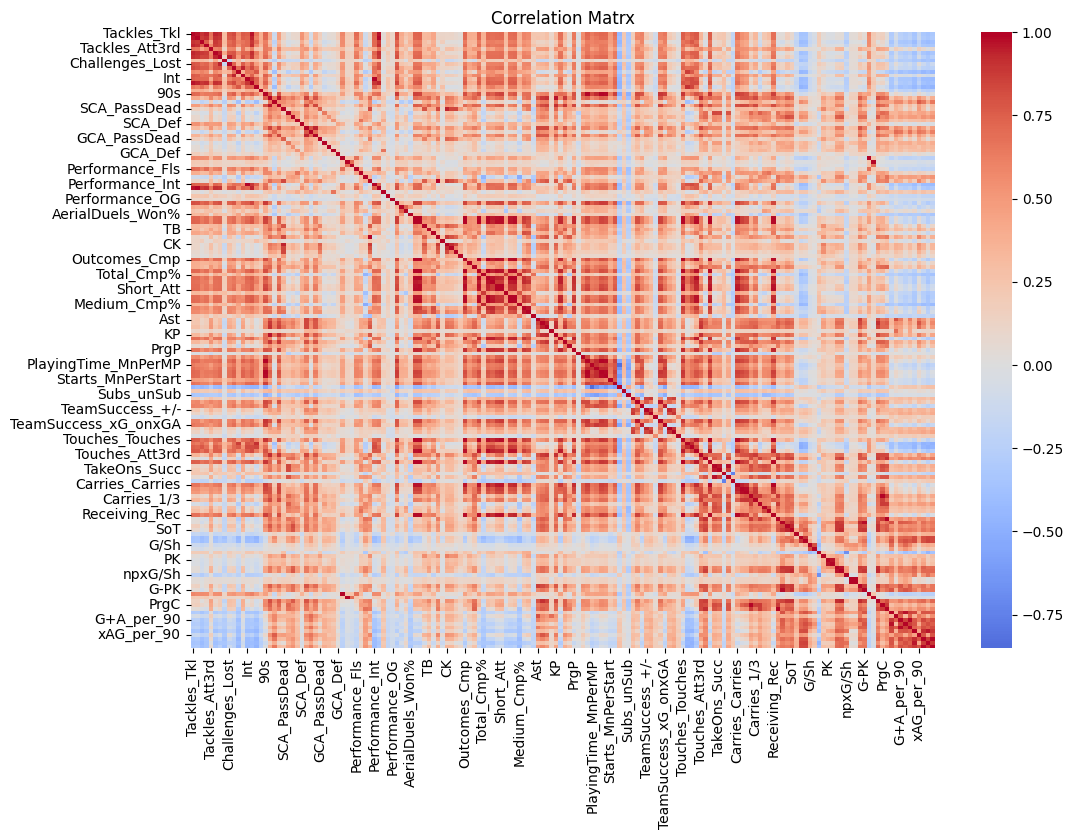

In [128]:
plt.figure(figsize=(12,8))
sns.heatmap(df_num_filtered.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrx")
plt.show()

### If two variables have a correlation > 0.9, keep only one of them.

In [129]:
corr_matrix = df_num_filtered.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated variables to consider for discarding:", to_drop)

df_num_filtered = df_num_filtered.drop(columns=to_drop)
df_num_filtered.shape

Highly correlated variables to consider for discarding: ['Tackles_TklW', 'Tackles_Def3rd', 'Tackles_Mid3rd', 'Challenges_Tkl', 'Challenges_Att', 'Challenges_Lost', 'Blocks_Pass', 'TklInt', 'SCA_PassLive', 'GCA_PassLive', 'Performance_Int', 'Performance_TklW', 'Live', 'Crs', 'CK', 'CornerKicks_In', 'Outcomes_Cmp', 'Total_Cmp', 'Total_TotDist', 'Total_PrgDist', 'Short_Cmp', 'Short_Att', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'xA', 'KP', '1/3', 'PrgP', 'PlayingTime_Min', 'PlayingTime_Min%', 'PlayingTime_90s', 'Starts_Starts', 'TeamSuccess_+/-90', 'TeamSuccess_xG_onxG', 'TeamSuccess_xG_onxGA', 'TeamSuccess_xG+/-', 'TeamSuccess_xG+/-90', 'Touches_Touches', 'Touches_DefPen', 'Touches_Def3rd', 'Touches_Mid3rd', 'Touches_Att3rd', 'Touches_Live', 'TakeOns_Succ', 'TakeOns_Tkld', 'Carries_Carries', 'Carries_TotDist', 'Carries_PrgDist', 'Receiving_Rec', 'Receiving_PrgR', 'SoT', 'SoT/90', 'PKatt', 'npxG', 'np:G-xG', 'G+A', 'G-PK', 'CrdY', 'CrdR', 'npxG+xAG', 'PrgC', 'Prg

(496, 94)

In [130]:
df_num_filtered

,Tackles_Tkl,Tackles_Att3rd,Challenges_Tkl%,Blocks_Blocks,Blocks_Sh,Int,Clr,Err,90s,SCA,...,FK,PK,xG,npxG/Sh,G-xG,Gls_per_90,Ast_per_90,G+A_per_90,xG_per_90,xAG_per_90
2,49.0,1.0,41.7,21.0,5.0,14.0,43.0,1.0,22.5,41.0,...,0.0,0.0,0.9,0.07,-0.9,0.00,0.04,0.04,0.04,0.03
3,67.0,7.0,38.6,30.0,7.0,43.0,48.0,1.0,31.4,45.0,...,0.0,0.0,0.8,0.03,-0.8,0.00,0.03,0.03,0.03,0.05
5,19.0,3.0,54.5,5.0,2.0,10.0,14.0,1.0,6.3,11.0,...,0.0,0.0,0.3,0.05,0.7,0.16,0.16,0.32,0.05,0.11
6,43.0,9.0,26.5,30.0,1.0,5.0,20.0,0.0,14.9,29.0,...,0.0,0.0,2.3,0.09,-0.3,0.13,0.13,0.27,0.15,0.19
7,47.0,10.0,39.1,34.0,2.0,14.0,40.0,0.0,35.2,107.0,...,1.0,1.0,3.5,0.08,1.5,0.14,0.17,0.31,0.10,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,46.0,3.0,45.3,28.0,9.0,32.0,30.0,4.0,27.6,73.0,...,5.0,0.0,1.0,0.04,0.0,0.04,0.11,0.14,0.04,0.12
989,45.0,3.0,66.7,16.0,6.0,20.0,70.0,2.0,20.9,8.0,...,0.0,0.0,0.3,0.08,-0.3,0.00,0.00,0.00,0.01,0.00
990,36.0,7.0,76.5,20.0,9.0,10.0,22.0,1.0,18.4,41.0,...,0.0,0.0,0.2,0.04,-0.2,0.00,0.11,0.11,0.01,0.06
992,35.0,4.0,38.5,19.0,4.0,8.0,21.0,0.0,15.3,29.0,...,0.0,0.0,1.9,0.06,0.1,0.13,0.07,0.20,0.13,0.06


## Normalization

In [131]:

scaler = StandardScaler()
df_num_filtered_scaled = scaler.fit_transform(df_num_filtered)

In [132]:
df_num_filtered_scaled

array([[ 0.47692913, -1.15222261, -0.31520692, ..., -1.17294801,
        -0.91906373, -1.1681342 ],
       [ 1.24221008,  0.17069965, -0.55572211, ..., -1.22049089,
        -0.99936242, -0.91828747],
       [-0.79853914, -0.71124853,  0.67788806, ...,  0.15825261,
        -0.83876505, -0.16874729],
       ...,
       [-0.07577379,  0.17069965,  2.38477005, ..., -0.84014786,
        -1.15995978, -0.7933641 ],
       [-0.1182894 , -0.49076148, -0.56348066, ..., -0.41226194,
        -0.19637561, -0.7933641 ],
       [ 0.68950717,  0.17069965, -1.07554526, ..., -1.17294801,
        -0.67816769, -0.54351738]])

# PCA


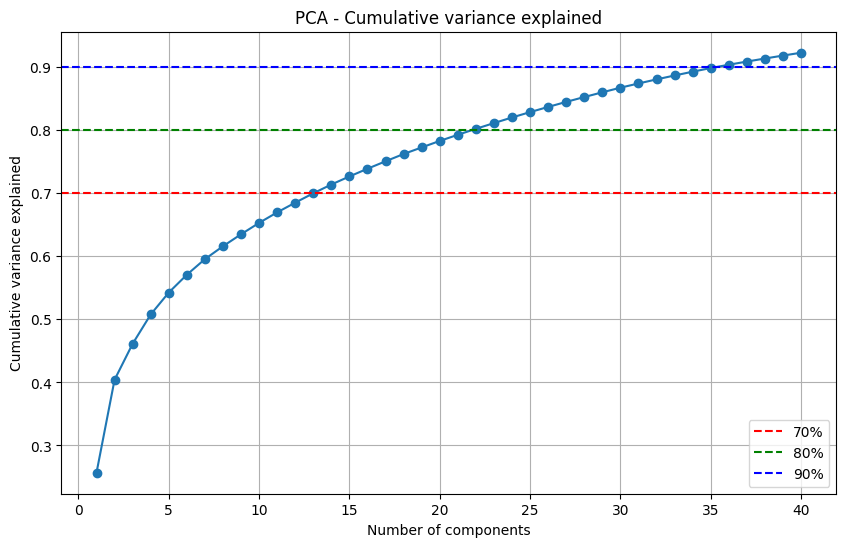

Components for 70% variance: 13
Components for 80% variance: 22
Components for 90% variance: 36


In [ ]:


# Set the maximum number of components to consider
n_comp = min(40, df_num_filtered_scaled.shape[1])  

pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(df_num_filtered_scaled)

# Cumulative explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(range(1, n_comp+1), explained_var, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance explained")
plt.title("PCA - Cumulative variance explained")
plt.axhline(y=0.7, color='r', linestyle='--', label="70%")
plt.axhline(y=0.8, color='g', linestyle='--', label="80%")
plt.axhline(y=0.9, color='b', linestyle='--', label="90%")
plt.legend()
plt.grid(True)
plt.show()

# Determine the number of components for variance thresholds
import numpy as np

explained_var = np.cumsum(pca.explained_variance_ratio_)

def components_for_threshold(threshold):
    return np.argmax(explained_var >= threshold) + 1

print("Components for 70% variance:", components_for_threshold(0.7))
print("Components for 80% variance:", components_for_threshold(0.8))
print("Components for 90% variance:", components_for_threshold(0.9))

# Clustering

## PCA with 36 Components

In [ ]:


# PCA with 36 components
pca = PCA(n_components=36)
df_num_filtered_scaled_pca = pca.fit_transform(df_num_filtered_scaled)

## K-Means

### Find the optimal number of clusters

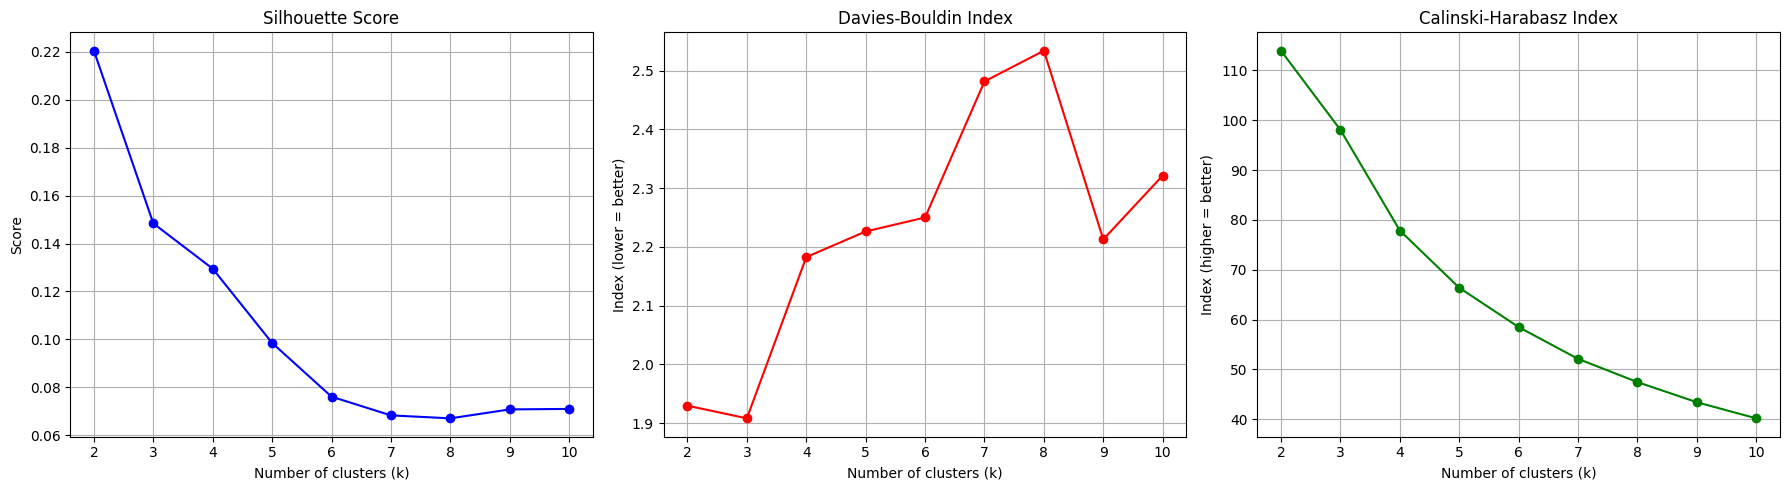

In [ ]:
# Find the optimal number of clusters
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_num_filtered_scaled_pca)
    score = silhouette_score(df_num_filtered_scaled_pca, labels)
    silhouette_scores.append(score)




# Also calculates DBI and CH
dbi_scores = []
ch_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_num_filtered_scaled_pca)

    # Davies-Bouldin Index (the lower is better)
    dbi = davies_bouldin_score(df_num_filtered_scaled_pca, labels)
    dbi_scores.append(dbi)

    # Calinski-Harabasz (the higher the better)
    ch = calinski_harabasz_score(df_num_filtered_scaled_pca, labels)
    ch_scores.append(ch)


# Comparative plot in un'unica figura
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) Davies-Bouldin Index
axes[1].plot(K_range, dbi_scores, marker='o', color='red')
axes[1].set_title("Davies-Bouldin Index")
axes[1].set_xlabel("Number of clusters (k)")
axes[1].set_ylabel("Index (lower = better)")
axes[1].grid(True)

# 2) Calinski-Harabasz Index
axes[2].plot(K_range, ch_scores, marker='o', color='green')
axes[2].set_title("Calinski-Harabasz Index")
axes[2].set_xlabel("Number of clusters (k)")
axes[2].set_ylabel("Index (higher = better)")
axes[2].grid(True)

# 3) Silhouette Score
axes[0].plot(K_range, silhouette_scores, marker='o', color='blue')
axes[0].set_title("Silhouette Score")
axes[0].set_xlabel("Number of clusters (k)")
axes[0].set_ylabel("Score")
axes[0].grid(True)

plt.tight_layout()
plt.show()



### K=2

In [ ]:
kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_k2_means = kmeans_k2.fit_predict(df_num_filtered_scaled_pca)

         Tackles_Tkl  Tackles_Att3rd  Challenges_Tkl%  Blocks_Blocks  \
Cluster                                                                
0          -0.167158       -0.287381         0.103153      -0.213971   
1           0.393047        0.675734        -0.242549       0.503121   

         Blocks_Sh       Int       Clr       Err       90s       SCA  ...  \
Cluster                                                               ...   
0         0.044174 -0.092646 -0.020246 -0.084751 -0.394380 -0.499939  ...   
1        -0.103869  0.217844  0.047606  0.199280  0.927326  1.175532  ...   

               FK        PK        xG   npxG/Sh      G-xG  Gls_per_90  \
Cluster                                                                 
0       -0.212937 -0.178849 -0.394944 -0.072464 -0.136419   -0.213745   
1        0.500690  0.420538  0.928652  0.170387  0.320769    0.502590   

         Ast_per_90  G+A_per_90  xG_per_90  xAG_per_90  
Cluster                                             

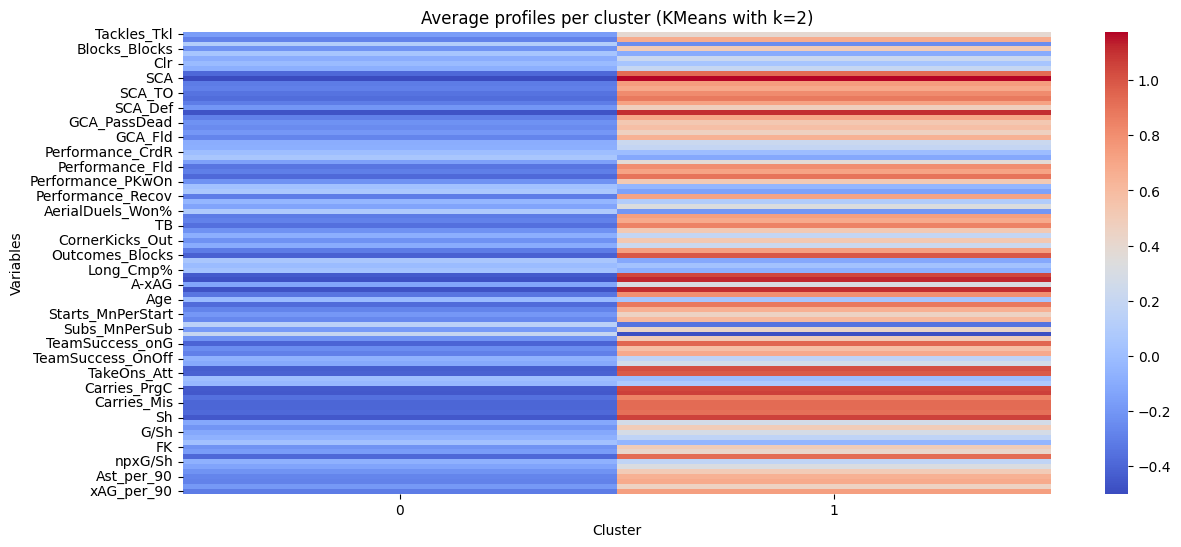

In [ ]:

# Average profiles per cluster (KMeans with k=2)
cluster_profiles_k2 = pd.DataFrame(df_num_filtered_scaled, columns=df_num_filtered.columns)
cluster_profiles_k2["Cluster"] = labels_k2_means

profiles_mean_k2 = cluster_profiles_k2.groupby("Cluster").mean()

# Show the first variables
print(profiles_mean_k2.head())


# View clusters in heatmap

plt.figure(figsize=(14,6))
sns.heatmap(profiles_mean_k2.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Average profiles per cluster (KMeans with k=2)")
plt.xlabel("Cluster")
plt.ylabel("Variables")
plt.show()


### The 10 variables that most differentiate the clusters

In [ ]:

# Calculation of absolute differences for each variable
diff = (profiles_mean_k2.loc[0] - profiles_mean_k2.loc[1]).abs()

# Sort by the most different variable
top10_vars = diff.sort_values(ascending=False).head(10)

print("The 10 variables that most differentiate the clusters:")
print(top10_vars)


The 10 variables that most differentiate the clusters:
SCA                1.675471
xAG                1.592847
PPA                1.581742
GCA                1.578727
Carries_1/3        1.515068
Sh                 1.506547
Carries_PrgC       1.480255
Ast                1.480020
Touches_AttPen     1.455790
Outcomes_Blocks    1.410329
dtype: float64


### Values for the two clusters on the 10 most discriminating variables

In [140]:
# Absolute differences
diff = (profiles_mean_k2.loc[0] - profiles_mean_k2.loc[1]).abs()

# 2. Take the 10 most diverse variables
top10_vars = diff.sort_values(ascending=False).head(10).index

# Select the values of these variables for both clusters
top10_values = profiles_mean_k2.loc[:, top10_vars]

print("Values for the two clusters on the 10 most discriminating variables:")
print(top10_values)


Values for the two clusters on the 10 most discriminating variables:
              SCA       xAG       PPA       GCA  Carries_1/3        Sh  \
Cluster                                                                  
0       -0.499939 -0.475285 -0.471971 -0.471072    -0.452077 -0.449534   
1        1.175532  1.117562  1.109770  1.107655     1.062991  1.057013   

         Carries_PrgC       Ast  Touches_AttPen  Outcomes_Blocks  
Cluster                                                           
0           -0.441689 -0.441619       -0.434389        -0.420824  
1            1.038566  1.038401        1.021401         0.989505  


### 2D cluster to view Barella K=2

In [141]:
# Threshold on number of matches played
threshold = 20  

# Filter players with at least 'threshold' matches played
df_filtered = df[df["MP"] >= threshold].copy()

# Print summary
print(f"Original dataset: {df.shape[0]} players")
print(f"Filtered dataset: {df_filtered.shape[0]} players (MP >= {threshold})")

Original dataset: 994 players
Filtered dataset: 496 players (MP >= 20)


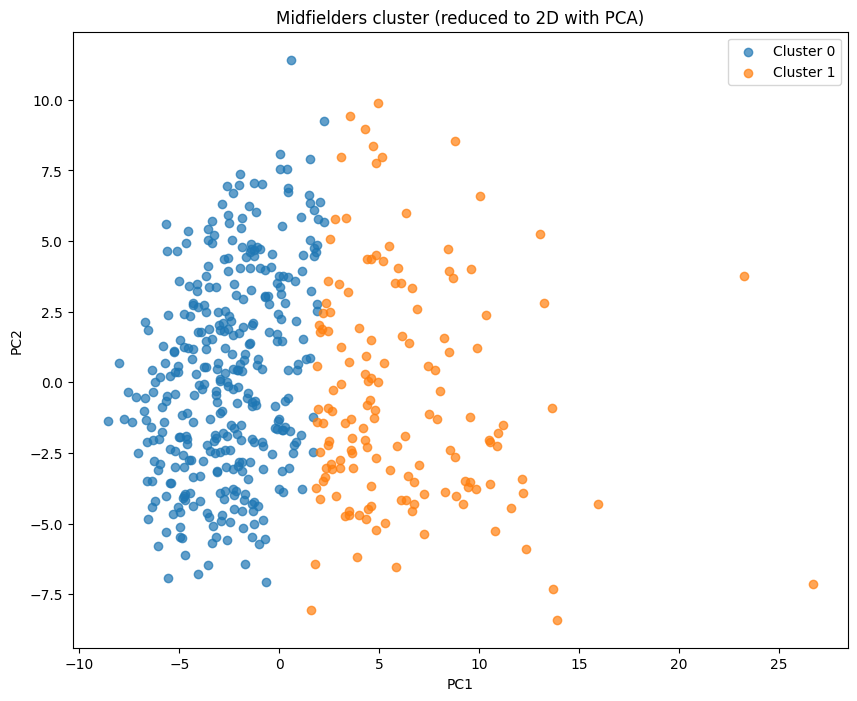

In [ ]:


# Reduction to 2 main components for display purposes only
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_num_filtered_scaled_pca)  # df_num_filtered_scaled_pca = the data in the 36 components

# Create DataFrame with player names
df_vis = pd.DataFrame({
    "PC1": X_vis[:,0],
    "PC2": X_vis[:,1],
    "Cluster": labels_k2_means,
    "Player": df_filtered["Player"]  
})

# Scatter plot
plt.figure(figsize=(10,8))
for c in df_vis["Cluster"].unique():
    cluster_data = df_vis[df_vis["Cluster"] == c]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Cluster {c}", alpha=0.7)

plt.title("Midfielders cluster (reduced to 2D with PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


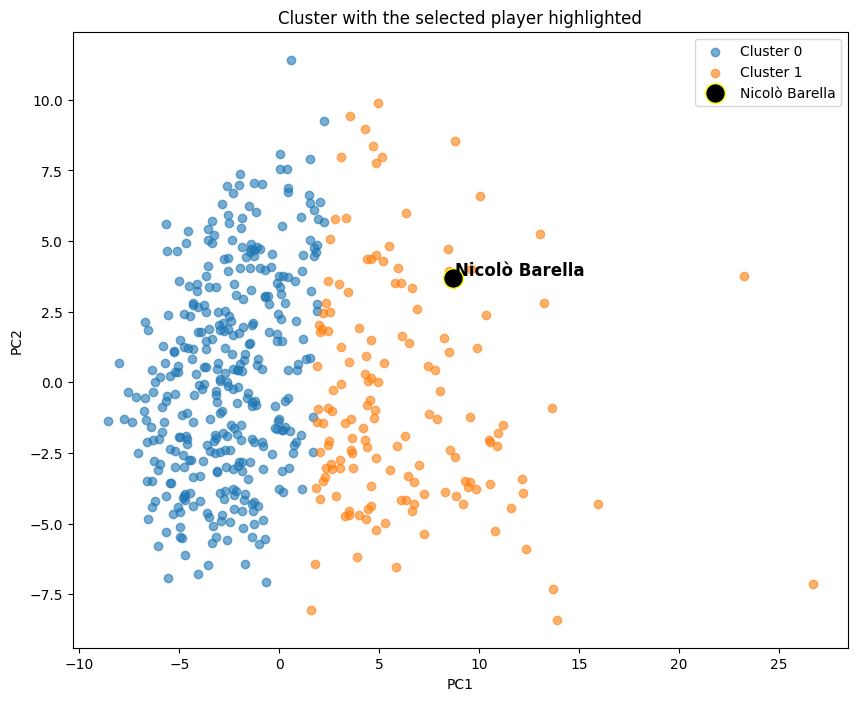

In [143]:
player_name = "Nicolò Barella"  
player_point = df_vis[df_vis["Player"] == player_name]

x = player_point["PC1"].values[0]
y = player_point["PC2"].values[0]

plt.figure(figsize=(10,8))
for c in df_vis["Cluster"].unique():
    cluster_data = df_vis[df_vis["Cluster"] == c]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Cluster {c}", alpha=0.6)

# Highlight the selected player
plt.scatter(x, y, color="black", s=200, edgecolors="yellow", label=player_name)
plt.text(x+0.1, y+0.1, player_name, fontsize=12, weight="bold", color="black")  # +0.1 to avoid overlapping the point

plt.title("Cluster with the selected player highlighted")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


### K=3

In [144]:
pca = PCA(n_components=36)
df_num_filtered_scaled_pca = pca.fit_transform(df_num_filtered_scaled)
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_k3_means = kmeans_k3.fit_predict(df_num_filtered_scaled_pca)

         Tackles_Tkl  Tackles_Att3rd  Challenges_Tkl%  Blocks_Blocks  \
Cluster                                                                
0           0.152167        0.622791        -0.363258       0.346806   
1          -0.674148       -0.527349        -0.108098      -0.679904   
2           0.920758        0.315208         0.459338       0.773163   

         Blocks_Sh       Int       Clr       Err       90s       SCA  ...  \
Cluster                                                               ...   
0        -0.326846 -0.078545 -0.191530  0.042114  0.847851  1.255359  ...   
1        -0.425953 -0.585315 -0.548380 -0.403977 -0.853663 -0.622823  ...   
2         0.921877  0.968812  1.002508  0.591210  0.639152 -0.045684  ...   

               FK        PK        xG   npxG/Sh      G-xG  Gls_per_90  \
Cluster                                                                 
0        0.618486  0.576751  1.184237  0.325934  0.377874    0.711076   
1       -0.174596 -0.151298 -0.356

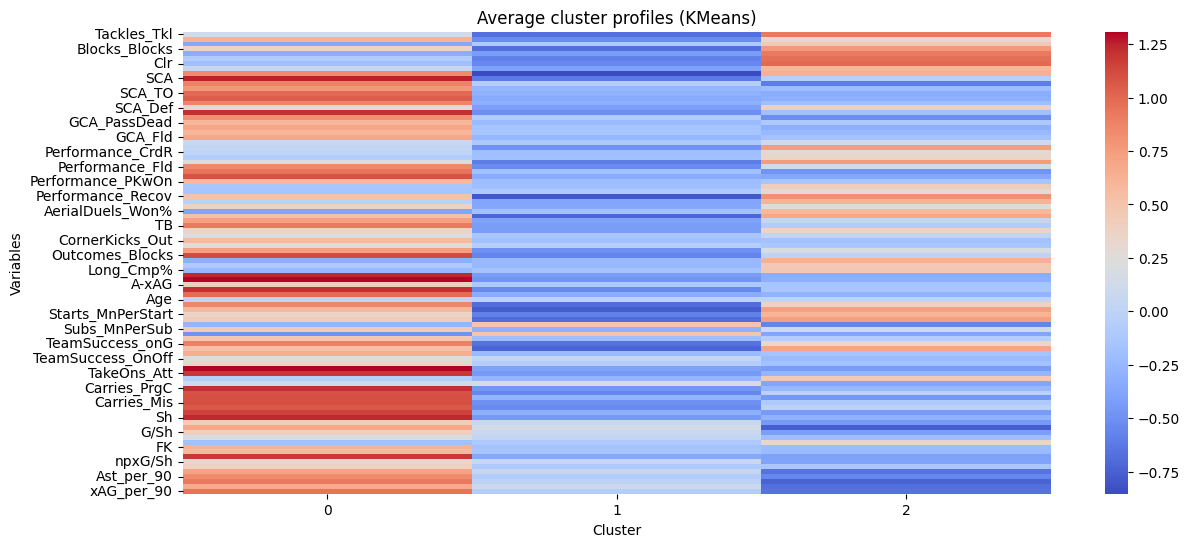

In [ ]:

# Average profiles per cluster (KMeans with k=3)
cluster_profiles_k3 = pd.DataFrame(df_num_filtered_scaled, columns=df_num_filtered.columns)
cluster_profiles_k3["Cluster"] = labels_k3_means

profiles_mean_k3 = cluster_profiles_k3.groupby("Cluster").mean()

# Show the first variables
print(profiles_mean_k3.head())


# View clusters in heatmap


plt.figure(figsize=(14,6))
sns.heatmap(profiles_mean_k3.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Average cluster profiles (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Variables")
plt.show()

### The 10 variables that most differentiate the clusters


In [ ]:

# Calculation of absolute differences for each variable
diff_k3 = (profiles_mean_k3.loc[0] - profiles_mean_k3.loc[1]).abs()

# Sort by the most different variable
top10_vars_k3 = diff_k3.sort_values(ascending=False).head(10)

print("The 10 variables that most differentiate the clusters:")
print(top10_vars_k3)


The 10 variables that most differentiate the clusters:
SCA                1.878182
xAG                1.789342
PPA                1.747677
GCA                1.718970
90s                1.701515
Touches_AttPen     1.696840
Carries_PrgC       1.688104
Outcomes_Blocks    1.686635
Sh                 1.685878
Ast                1.674457
dtype: float64


### Values for the two clusters on the 10 most discriminating variables


In [147]:
# Absolute differences
diff_k3 = (profiles_mean_k3.loc[0] - profiles_mean_k3.loc[1]).abs()

# Take the 10 most diverse variables
top10_vars_k3 = diff_k3.sort_values(ascending=False).head(10).index

#  Select the values of these variables for both clusters
top10_values_k3 = profiles_mean_k3.loc[:, top10_vars_k3]

print("Values for the two clusters on the 10 most discriminating variables:")
print(top10_values_k3)


Values for the two clusters on the 10 most discriminating variables:
              SCA       xAG       PPA       GCA       90s  Touches_AttPen  \
Cluster                                                                     
0        1.255359  1.308043  1.208304  1.210619  0.847851        1.300956   
1       -0.622823 -0.481299 -0.539373 -0.508351 -0.853663       -0.395884   
2       -0.045684 -0.307024 -0.136972 -0.186834  0.639152       -0.433488   

         Carries_PrgC  Outcomes_Blocks        Sh       Ast  
Cluster                                                     
0            1.218808         1.115155  1.236563  1.238806  
1           -0.469295        -0.571480 -0.449315 -0.435650  
2           -0.253849        -0.012395 -0.299040 -0.321987  


### 2D cluster to view Barella K=3

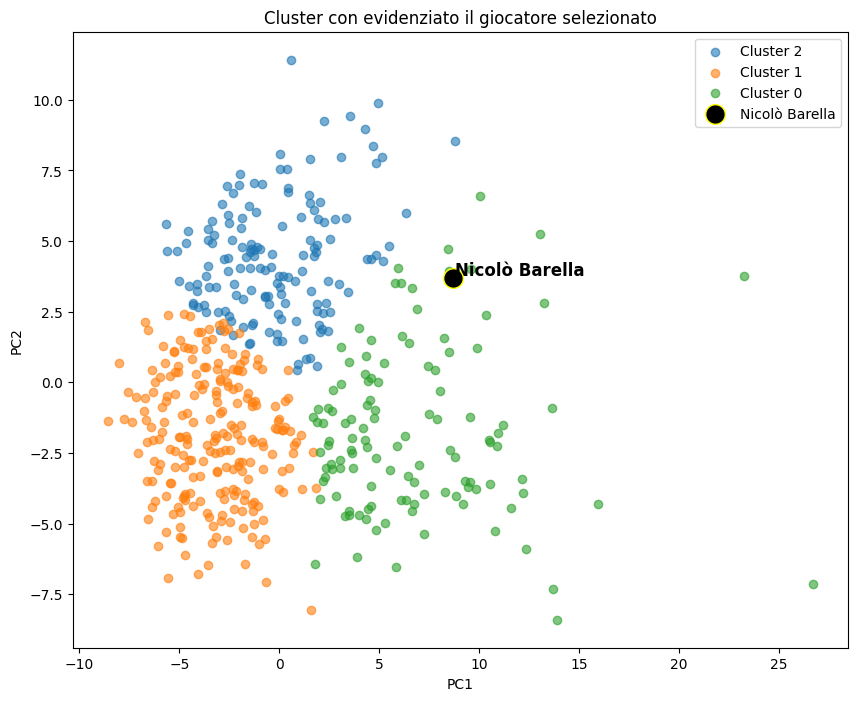

In [ ]:


# Reduction to 2 main components for display purposes only
pca_vis = PCA(n_components=3)
X_vis = pca_vis.fit_transform(df_num_filtered_scaled_pca)  

# Create DataFrame with player names
df_vis = pd.DataFrame({
    "PC1": X_vis[:,0],
    "PC2": X_vis[:,1],
    "Cluster": labels_k3_means,
    "Player": df_filtered["Player"]  
})

player_name = "Nicolò Barella"  
player_point = df_vis[df_vis["Player"] == player_name]

x = player_point["PC1"].values[0]
y = player_point["PC2"].values[0]

plt.figure(figsize=(10,8))
for c in df_vis["Cluster"].unique():
    cluster_data = df_vis[df_vis["Cluster"] == c]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Cluster {c}", alpha=0.6)

plt.scatter(x, y, color="black", s=200, edgecolors="yellow", label=player_name)
plt.text(x+0.1, y+0.1, player_name, fontsize=12, weight="bold", color="black") 

plt.title("Cluster con evidenziato il giocatore selezionato")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

## Hierarchical Clustering

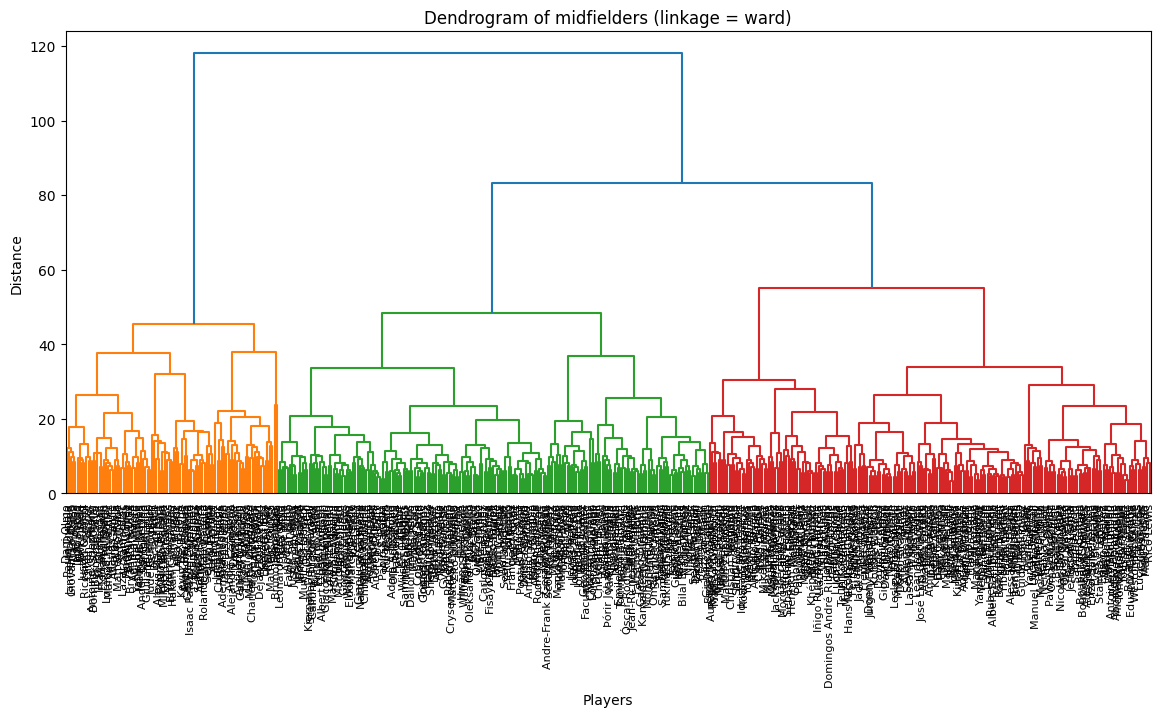

In [ ]:

# Hierarchical clustering with “ward” linkage
Z = linkage(df_num_filtered_scaled_pca, method="ward")

# Dendrogram plot
plt.figure(figsize=(14,6))
dendrogram(Z, labels=df_filtered["Player"].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrogram of midfielders (linkage = ward)")
plt.xlabel("Players")
plt.ylabel("Distance")
plt.show()

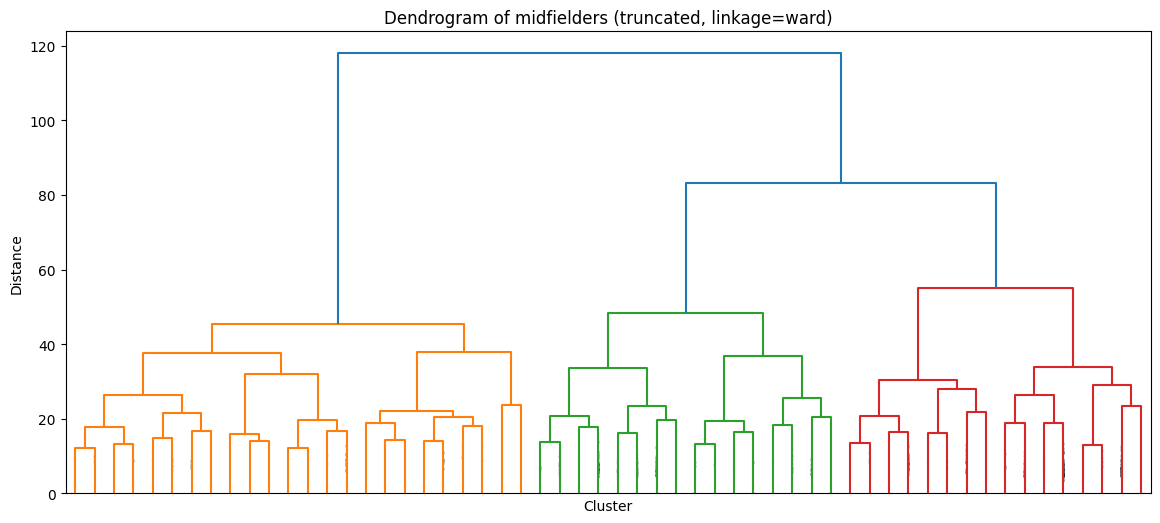

In [ ]:
# Show clusters in compact form (truncated)


# Hierarchical clustering with “ward” linkage
Z = linkage(df_num_filtered_scaled_pca, method="ward")

# Truncated dendrogram (only higher levels)
plt.figure(figsize=(14,6))
dendrogram(
    Z,
    truncate_mode="level",
    p=5,                    
    show_contracted=True,   
    no_labels=True          
)
plt.title("Dendrogram of midfielders (truncated, linkage=ward)")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.show()


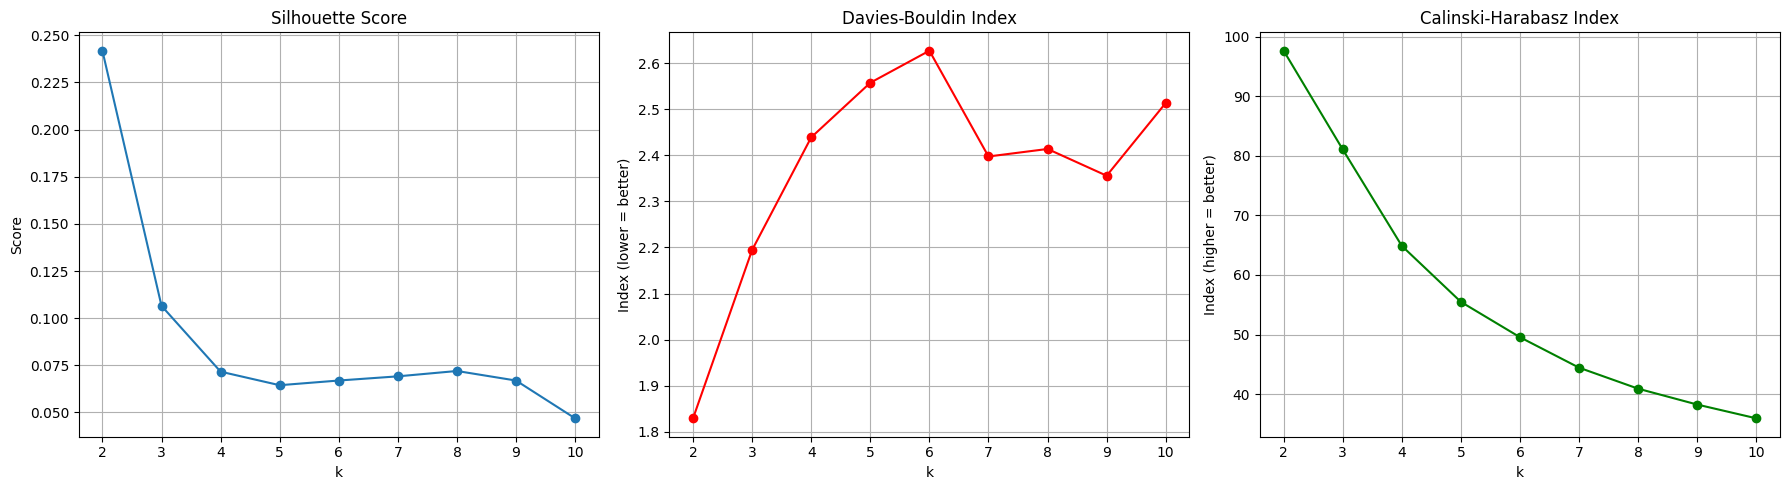

Miglior k (Silhouette): 2
Miglior k (Davies-Bouldin): 2
Miglior k (Calinski-Harabasz): 2


In [ ]:


sil_scores = []
dbi_scores = []
chi_scores = []
K_range = range(2, 11) 

for k in K_range:
    agg = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels = agg.fit_predict(df_num_filtered_scaled_pca)
    
    sil = silhouette_score(df_num_filtered_scaled_pca, labels)
    dbi = davies_bouldin_score(df_num_filtered_scaled_pca, labels)
    chi = calinski_harabasz_score(df_num_filtered_scaled_pca, labels)
    
    sil_scores.append(sil)
    dbi_scores.append(dbi)
    chi_scores.append(chi)


# Comparative plot in un'unica figura
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) Silhouette Score
axes[0].plot(K_range, sil_scores, marker="o")
axes[0].set_title("Silhouette Score")
axes[0].set_xlabel("k")
axes[0].set_ylabel("Score")
axes[0].grid(True)

# 2) Davies-Bouldin Index
axes[1].plot(K_range, dbi_scores, marker="o", color="red")
axes[1].set_title("Davies-Bouldin Index")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Index (lower = better)")
axes[1].grid(True)

# 3) Calinski-Harabasz Index
axes[2].plot(K_range, chi_scores, marker="o", color="green")
axes[2].set_title("Calinski-Harabasz Index")
axes[2].set_xlabel("k")
axes[2].set_ylabel("Index (higher = better)")
axes[2].grid(True)

plt.tight_layout()
plt.show()


# Find the best values
best_sil_k = K_range[sil_scores.index(max(sil_scores))]
best_dbi_k = K_range[dbi_scores.index(min(dbi_scores))]
best_chi_k = K_range[chi_scores.index(max(chi_scores))]

print(f"Miglior k (Silhouette): {best_sil_k}")
print(f"Miglior k (Davies-Bouldin): {best_dbi_k}")
print(f"Miglior k (Calinski-Harabasz): {best_chi_k}")


         Tackles_Tkl  Tackles_Att3rd  Challenges_Tkl%  Blocks_Blocks  \
Cluster                                                                
0          -0.045086       -0.175780         0.097824      -0.092779   
1           0.185456        0.723054        -0.402391       0.381639   

         Blocks_Sh       Int       Clr       Err       90s       SCA  ...  \
Cluster                                                               ...   
0         0.079231  0.016415  0.047831  0.000608 -0.211888 -0.350076  ...   
1        -0.325909 -0.067523 -0.196749 -0.002499  0.871582  1.440002  ...   

               FK        PK        xG   npxG/Sh      G-xG  Gls_per_90  \
Cluster                                                                 
0       -0.178116 -0.179699 -0.317818 -0.084423 -0.074528   -0.185445   
1        0.732664  0.739173  1.307313  0.347266  0.306563    0.762811   

         Ast_per_90  G+A_per_90  xG_per_90  xAG_per_90  
Cluster                                             

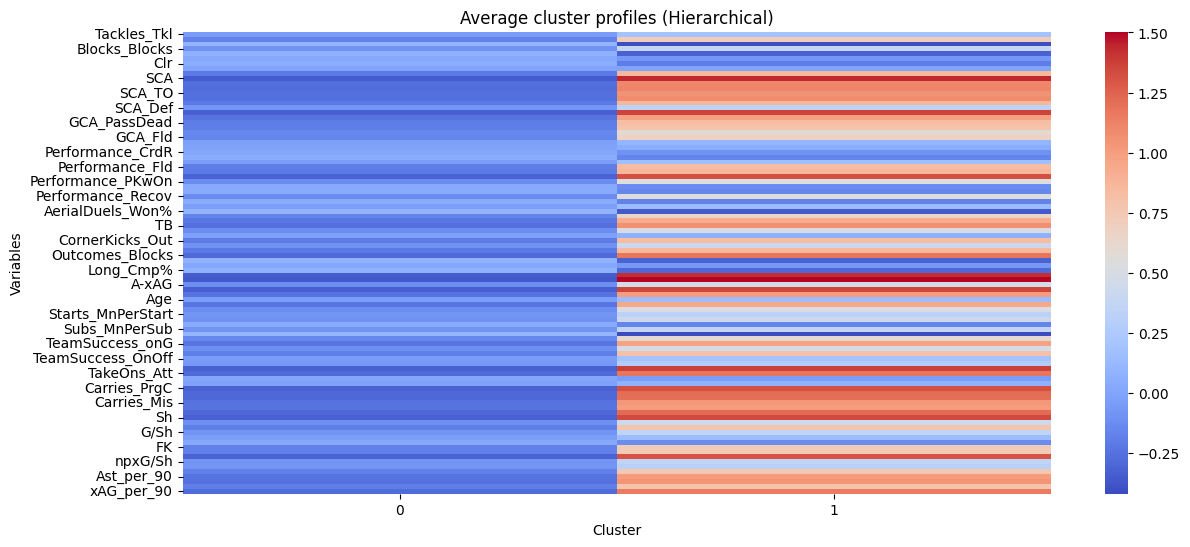

The 10 variables that most differentiate the clusters:
xAG                1.868350
SCA                1.790078
Ast                1.769550
Touches_AttPen     1.700685
GCA                1.699249
PPA                1.690340
Sh                 1.663390
Carries_PrgC       1.652577
Performance_Crs    1.651029
xG                 1.625131
dtype: float64
Values for the two clusters on the 10 most discriminating variables:
              xAG       SCA       Ast  Touches_AttPen       GCA       PPA  \
Cluster                                                                     
0       -0.365383 -0.350076 -0.346061       -0.332594 -0.332313 -0.330571   
1        1.502967  1.440002  1.423489        1.368091  1.366936  1.359770   

              Sh  Carries_PrgC  Performance_Crs        xG  
Cluster                                                    
0       -0.32530     -0.323186        -0.322883 -0.317818  
1        1.33809      1.329392         1.328147  1.307313  


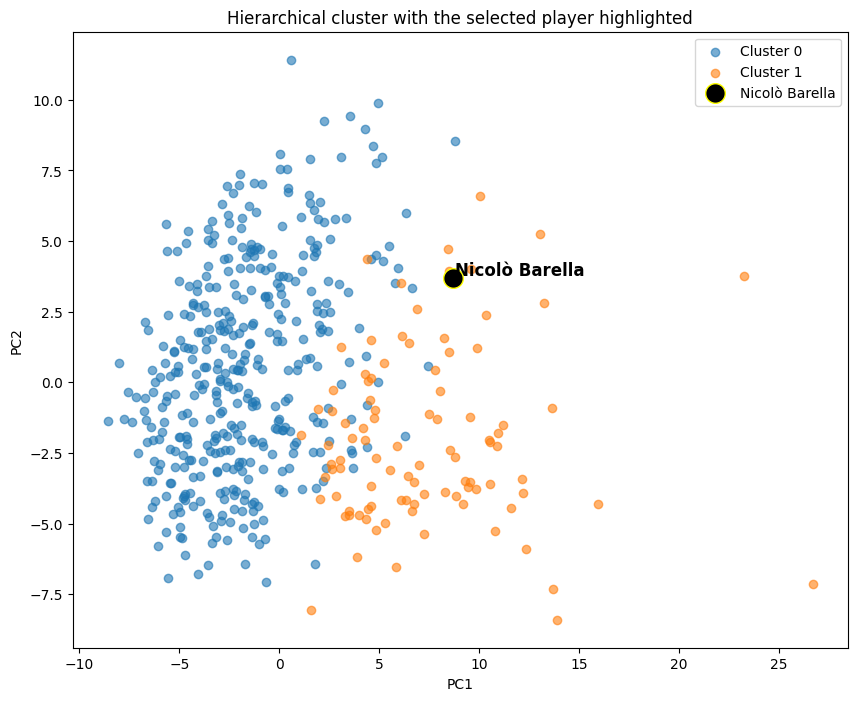

In [ ]:


# Hierarchical Clustering (with 2 clusters, as in your KMeans)
agglo_k2 = AgglomerativeClustering(n_clusters=2, linkage="ward")  
labels_k2_agglo = agglo_k2.fit_predict(df_num_filtered_scaled_pca)

# Average profiles per cluster (Hierarchical with k=2)
cluster_profiles_k2 = pd.DataFrame(df_num_filtered_scaled, columns=df_num_filtered.columns)
cluster_profiles_k2["Cluster"] = labels_k2_agglo

profiles_mean_k2 = cluster_profiles_k2.groupby("Cluster").mean()

# Show the first variables
print(profiles_mean_k2.head())

# Heatmap of average profiles
plt.figure(figsize=(14,6))
sns.heatmap(profiles_mean_k2.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Average cluster profiles (Hierarchical)")
plt.xlabel("Cluster")
plt.ylabel("Variables")
plt.show()

# Absolute differences between clusters
diff = (profiles_mean_k2.loc[0] - profiles_mean_k2.loc[1]).abs()
top10_vars = diff.sort_values(ascending=False).head(10)

print("The 10 variables that most differentiate the clusters:")
print(top10_vars)

# Values for the two clusters on the 10 most discriminating variables
top10_values = profiles_mean_k2.loc[:, top10_vars.index]
print("Values for the two clusters on the 10 most discriminating variables:")
print(top10_values)

# 2D visualization with PCA
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_num_filtered_scaled_pca)

df_vis = pd.DataFrame({
    "PC1": X_vis[:,0],
    "PC2": X_vis[:,1],
    "Cluster": labels_k2_agglo,
    "Player": df_filtered["Player"]
})



# Highlight Barella
player_name = "Nicolò Barella"  
player_point = df_vis[df_vis["Player"] == player_name]

x = player_point["PC1"].values[0]
y = player_point["PC2"].values[0]

plt.figure(figsize=(10,8))
for c in df_vis["Cluster"].unique():
    cluster_data = df_vis[df_vis["Cluster"] == c]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Cluster {c}", alpha=0.6)

plt.scatter(x, y, color="black", s=200, edgecolors="yellow", label=player_name)
plt.text(x+0.1, y+0.1, player_name, fontsize=12, weight="bold", color="black")

plt.title("Hierarchical cluster with the selected player highlighted")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


# KNN

In [ ]:


player_names = df_filtered["Player"].values
idx_barella = [i for i, name in enumerate(player_names) if "barella" in str(name).lower()][0]
barella_coords = df_num_filtered_scaled_pca[idx_barella].reshape(1, -1)

# Calculate the inverse covariance matrix for Mahalanobis
cov_matrix = np.cov(df_num_filtered_scaled_pca.T)
inv_cov_matrix = np.linalg.pinv(cov_matrix)  # pseudoinverse for stability

# Function to find the 3 closest with a given metric
def trova_vicini(metric, VI=None):
    if metric == "mahalanobis":
        nn = NearestNeighbors(n_neighbors=4, metric=metric, metric_params={"VI": VI})
    else:
        nn = NearestNeighbors(n_neighbors=4, metric=metric)
    
    nn.fit(df_num_filtered_scaled_pca)
    dist, ind = nn.kneighbors(barella_coords)
    
    # Let's create a table with the results
    vicini = pd.DataFrame({
        "Player": [player_names[i] for i in ind[0]],
        "Distance": dist[0]
    })
    
    # Exclude Barella himself and keep the 3 closest players
    vicini = vicini[vicini["Player"] != player_names[idx_barella]].head(3)
    return vicini

# We apply different metrics
vicini_euclidea = trova_vicini("euclidean")
vicini_manhattan = trova_vicini("manhattan")
vicini_cosine = trova_vicini("cosine")
vicini_mahalanobis = trova_vicini("mahalanobis", VI=inv_cov_matrix)

print("Close with distance Euclidea:\n", vicini_euclidea, "\n")
print("Close with distance Manhattan:\n", vicini_manhattan, "\n")
print("Close with distance Cosine:\n", vicini_cosine, "\n")
print("Close with distance Mahalanobis:\n", vicini_mahalanobis, "\n")


Close with distance Euclidea:
             Player  Distance
1  Rodrigo De Paul  6.040037
2  Bruno Guimarães  8.328203
3   Enzo Fernández  9.091944 

Close with distance Manhattan:
             Player   Distance
1  Rodrigo De Paul  29.547666
2  Bruno Guimarães  38.835473
3  Martin Ødegaard  41.782968 

Close with distance Cosine:
             Player  Distance
1  Rodrigo De Paul  0.132516
2            Pedri  0.219914
3  Bruno Guimarães  0.239546 

Close with distance Mahalanobis:
             Player  Distance
1  Rodrigo De Paul  5.406723
2       Luka Sučić  6.823428
3    Javier Guerra  6.842702 



# Radar Chart Creation

## Data Preparation and Index Creation for Radar Chart

In [ ]:

# Initialize the scaler
scaler = MinMaxScaler()

# Scale only the numeric columns (0–1)
df_norm = scaler.fit_transform(df_num)

# Reconstruct DataFrame, keeping original column names and index
df_norm = pd.DataFrame(df_norm, columns=df_num.columns, index=df_num.index)

# Display the normalized dataframe
df_norm

# Define the columns that describe shooting attributes
shooting_cols = [
    "Gls", "G-xG", "Gls_per_90", "xG_per_90",
    "Sh", "SoT%", "Sh/90", "SoT/90",
    "G/Sh", "G/SoT", "Dist", "FK", "PK", "npxG/Sh"
]

# Compute the Shooting index as the row-wise mean of the selected columns
df_norm["Shooting"] = df_norm[shooting_cols].mean(axis=1)

# Display the updated dataframe
df_norm

# Define the columns that describe passing attributes
passing_cols = [
    "Total_Cmp%", "SCA_PassDead", "SCA", "SCA90", "GCA_PassDead", "GCA90",
    "Ast", "A-xAG", "CrsPA", "TB", "Sw", "Long_Cmp%"
]

# Compute the Passing index as the row-wise mean of these metrics
df_norm["Passing"] = df_norm[passing_cols].mean(axis=1)

# Define the columns that describe defensive attributes
defense_cols = [
    "Tackles_Tkl", "Tackles_Att3rd", "Challenges_Tkl%", "Blocks_Sh", "Sh", "Int",
    "Clr", "Err"
]

# Compute the Defense index as the row-wise mean of these metrics
df_norm["Defense"] = df_norm[defense_cols].mean(axis=1)

# Define the columns that describe dribbling attributes
dribbling_cols = [
    "Touches_AttPen", "TakeOns_Att", "TakeOns_Succ%", "TakeOns_Tkld%",
    "Carries_CPA", "Carries_Mis"
]

# Compute the Dribbling index as the row-wise mean of these metrics
df_norm["Dribbling"] = df_norm[dribbling_cols].mean(axis=1)

# Define the columns that describe physique attributes
Physique_cols = [
    "PlayingTime_MnPerMP", "Starts_MnPerStart", "Starts_Compl",
    "AerialDuels_Won", "AerialDuels_Lost", "AerialDuels_Won%"
]

# Compute the Physique index as the row-wise mean of these metrics
df_norm["Physique"] = df_norm[Physique_cols].mean(axis=1)

# Add back the Player column from the original dataframe
df_norm["Player"] = df["Player"]

# Display the updated dataframe
df_norm

# Keep only players whose position is in the specified list
keep_positions = ["MF", "DF,MF", "MF,DF"]
df_norm = df_norm[df_norm["Pos"].isin(keep_positions)]

# Show the filtered dataframe
df_norm

# Select the skill columns to normalize
cols = ["Shooting", "Passing", "Defense", "Physique", "Dribbling"]

# Add the 'Pos' column from the original dataframe
df_norm['Pos'] = df['Pos']

# Normalize skill columns to a 0–100 scale
df_norm[cols] = ((df_norm[cols] - df_norm[cols].min()) /
                 (df_norm[cols].max() - df_norm[cols].min())) * 100

# Display the normalized dataframe
df_norm

# Filter dataframe to include only specific players
df_players = df_norm[df_norm["Player"].isin([
    "Nicolò Barella", "Pedri", "Bruno Guimarães", "Rodrigo De Paul",
    "Enzo Fernández", "Martin Ødegaard", "Luka Sučić", "Javier Guerra"
])]

# Keep only the relevant columns for analysis
cols_player = ["Player", "Shooting", "Passing", "Dribbling", "Defense", "Physique"]
df_selected = df_players[cols_player]

# Show the final filtered dataframe
df_selected

# Transform the dataframe from wide format to long format
df_long = df_selected.melt(
    id_vars="Player",      # keep the "Player" column as an identifier (it will not be melted)
    var_name="Index",      # the former column names (e.g., Shooting, Passing, Defense) become values in a new column called "Index"
    value_name="Value"     # the corresponding cell values go into a new column called "Value"
)

## Radar Chart 

In [ ]:


# ============================
# Color palette as in the original Dash
# ============================
colors = pc.qualitative.Plotly  # same palette used in Dash

players = df_long['Player'].unique().tolist()
indices = df_long['Index'].unique().tolist()

# Function to get the values of each player
def get_values(player):
    vals = df_long[df_long['Player'] == player].set_index('Index').loc[indices, 'Value'].tolist()
    vals.append(vals[0])  # radar closure
    return vals

# ============================
# Create figure
# ============================
fig = go.Figure()

for i, player in enumerate(players):
    fig.add_trace(go.Scatterpolar(
        r=get_values(player),
        theta=indices + [indices[0]],
        fill='toself',
        name=player,
        line=dict(width=3, color=colors[i % len(colors)]),
        marker=dict(size=8),
        opacity=1,
        visible=True,
        fillcolor=f'rgba{tuple(int(colors[i % len(colors)].lstrip("#")[j:j+2],16) for j in (0,2,4)) + (0.1,)}'  # 10% transparent fill
    ))

# ============================
# Aesthetic layout with title on the left
# ============================
fig.update_layout(
    title=dict(
        text="Interactive Radar Chart",
        x=0.01,  # shifted to the left
        font=dict(size=26, family="Arial Black", color="white")
    ),
    polar=dict(
        radialaxis=dict(
            range=[0, 100],
            showline=False,
            showticklabels=False,
            showgrid=False
        ),
        angularaxis=dict(
            tickfont=dict(size=25, family="Arial Black", color="white"),
            rotation=90,
            direction="clockwise"
        )
    ),
    legend=dict(title='Player', font=dict(size=16, family="Arial Black", color="white")),
    template='plotly_dark'
)

# ============================
# Save as standalone HTML
# ============================
fig.write_html("C:/Users/andre/OneDrive/Desktop/DSLAB/radar_chart_estetico.html", include_plotlyjs='cdn')
print("Chart saved as 'radar_chart_estetico.html'.")
